# Final Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
import itertools
from numpy import linspace
from scipy.spatial import distance
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Loading data

In [2]:
f = open('Occupancy/HomeA/Home_A_summer_energytrace_occupancy.csv')
data1 = pd.read_csv(f,sep=',', header='infer', parse_dates=[0])
print(data1.head(10))



                 Time     Power  Occupancy
0 2013-07-08 00:14:00  1.093450          2
1 2013-07-08 00:15:00  1.092317          2
2 2013-07-08 00:16:00  1.132967          2
3 2013-07-08 00:17:00  1.519983          2
4 2013-07-08 00:18:00  1.481333          2
5 2013-07-08 00:19:00  1.493050          2
6 2013-07-08 00:20:00  1.507783          2
7 2013-07-08 00:21:00  1.514933          2
8 2013-07-08 00:22:00  1.566167          2
9 2013-07-08 00:23:00  1.534267          2


In [3]:
f1 = open('Occupancy/HomeB/Home_B_summer_energytrace_occupancy.csv')
data2 = pd.read_csv(f1,sep=',', header='infer', parse_dates=[0])
print(data2.head(10))

                 Time     Power  Occupancy
0 2013-07-15 00:14:00  2.872133          2
1 2013-07-15 00:15:00  2.873317          2
2 2013-07-15 00:16:00  2.872350          2
3 2013-07-15 00:17:00  2.870833          2
4 2013-07-15 00:18:00  2.887317          2
5 2013-07-15 00:19:00  2.866667          2
6 2013-07-15 00:20:00  2.868867          2
7 2013-07-15 00:21:00  2.876083          2
8 2013-07-15 00:22:00  2.872817          2
9 2013-07-15 00:23:00  2.875917          2


In [4]:
print(data1.columns)
print(data2.columns)

Index(['Time', 'Power', 'Occupancy'], dtype='object')
Index(['Time', 'Power', 'Occupancy'], dtype='object')


Text(0.5,1,'Home A')

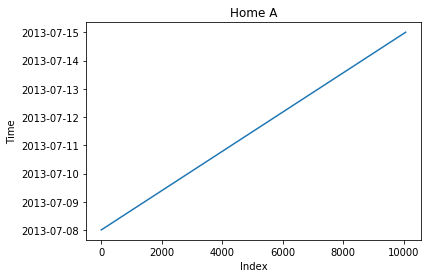

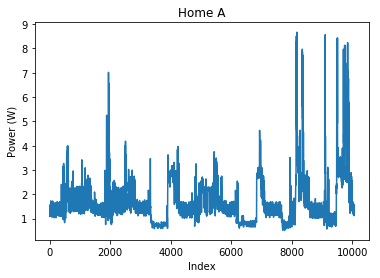

In [5]:
plt.figure(1)
plt.plot(data1['Time'])
plt.ylabel('Time')
plt.xlabel('Index')
plt.title("Home A")

plt.figure(2)
plt.plot(data1['Power'])
plt.ylabel('Power (W)')
plt.xlabel('Index')
plt.title("Home A")

Text(0.5,1,'Home B')

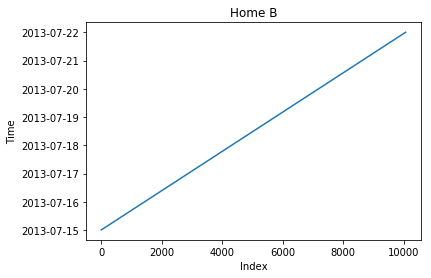

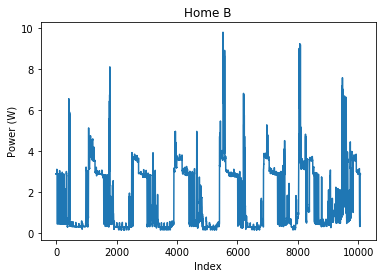

In [6]:
plt.figure(1)
plt.plot(data2['Time'])
plt.ylabel('Time')
plt.xlabel('Index')
plt.title("Home B")

plt.figure(2)
plt.plot(data2['Power'])
plt.ylabel('Power (W)')
plt.xlabel('Index')
plt.title("Home B")


Text(0.5,1,'Home A')

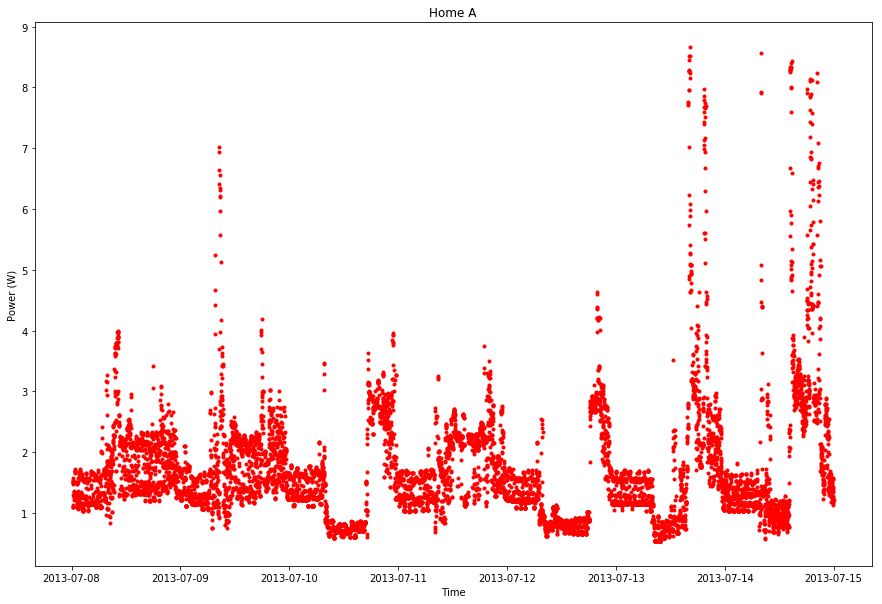

In [7]:
plt.figure(figsize=(15,10))
plt.plot(data1['Time'],data1['Power'],'r.')
plt.ylabel('Power (W)')
plt.xlabel('Time')
plt.title("Home A")

Text(0.5,1,'Home B')

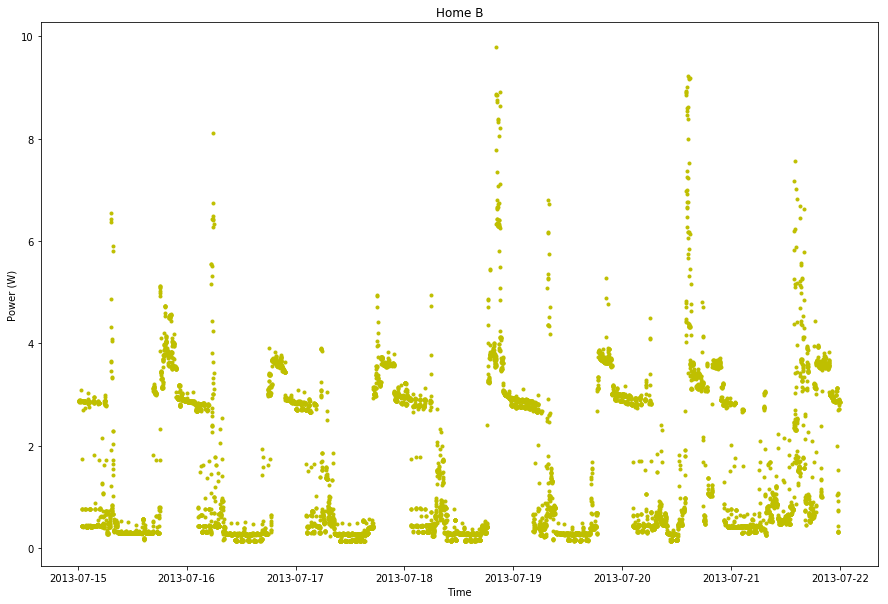

In [8]:
plt.figure(figsize=(15,10))
plt.plot(data2['Time'],data2['Power'],'y.')
plt.ylabel('Power (W)')
plt.xlabel('Time')
plt.title("Home B")


In [9]:
data1['hour']=data1['Time'].dt.hour
data1['dayofyear'] = data1['Time'].dt.dayofyear

data2['hour']=data2['Time'].dt.hour
data2['dayofyear'] = data2['Time'].dt.dayofyear

DailyLoad curve and average load curve

Text(0.5,1,'Load Curves')

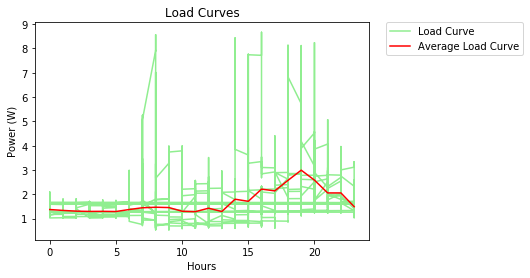

In [10]:
plt.plot(data1['hour'], data1['Power'],color='lightgreen',label="Load Curve")
plt.plot(data1.groupby(['hour'])['Power'].mean(),color='red',label="Average Load Curve")
plt.ylabel('Power (W)')
plt.xlabel('Hours')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Load Curves')

Text(0.5,1,'Load Curves')

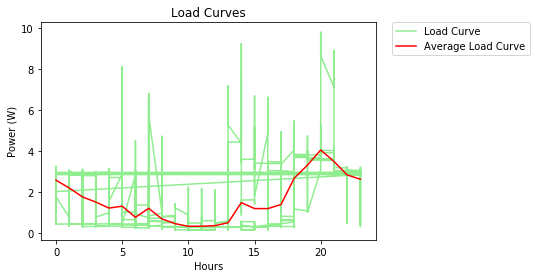

In [11]:
plt.plot(data2['hour'], data2['Power'],color='lightgreen',label="Load Curve")
plt.plot(data2.groupby(['hour'])['Power'].mean(),color='red',label="Average Load Curve")
plt.ylabel('Power (W)')
plt.xlabel('Hours')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Load Curves')

# SVM Classification and Prediction

defining the function

In [12]:
clf1 = svm.SVC(gamma=0.1,C =1)
clf2 = svm.SVC(gamma=0.1,C =1)

In [13]:
power1=data1['Power']
power1=np.expand_dims(power1,axis=1)

occ1=data1['Occupancy']

power2=data2['Power']
power2=np.expand_dims(power2,axis=1)

occ2=data2['Occupancy']

x1,y1 = power1[:-1000],occ1[:-1000]
x2,y2 = power2[:-1000],occ2[:-1000]



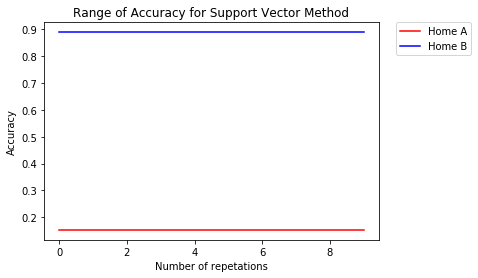

In [14]:
accuracy1=[]
accuracy2=[]

for i in range(10):
    clf1.fit(x1,y1)
    clf2.fit(x2,y2)
    j1=np.zeros((1000,1))
    j2=np.zeros((1000,1))
    for i in range(1,1000):
        j1[i,]=(clf1.predict(power1[[-i]]))
        j2[i,]=(clf2.predict(power2[[-i]]))
    accuracy1.append(accuracy_score(occ1[-1000:],j1,normalize=True))
    accuracy2.append(accuracy_score(occ2[-1000:],j2,normalize=True))

# print(np.unique(j))
# print(type(j))
plt.plot(accuracy1,'r',label="Home A")
plt.plot(accuracy2,'b',label="Home B")
plt.xlabel('Number of repetations')
plt.ylabel('Accuracy')
plt.title('Range of Accuracy for Support Vector Method')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [15]:
print(accuracy1)
print(accuracy2)

[0.153, 0.153, 0.153, 0.153, 0.153, 0.153, 0.153, 0.153, 0.153, 0.153]
[0.88900000000000001, 0.88900000000000001, 0.88900000000000001, 0.88900000000000001, 0.88900000000000001, 0.88900000000000001, 0.88900000000000001, 0.88900000000000001, 0.88900000000000001, 0.88900000000000001]


# KNN

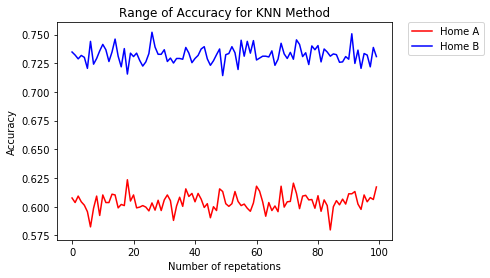

In [16]:
from sklearn import preprocessing,cross_validation, neighbors
X1 = np.array(data1['Power'])

X1 = X1.reshape(len(X1),-1)
y1=np.array(data1['Occupancy'])

X2 = np.array(data2['Power'])

X2 = X1.reshape(len(X2),-1)
y2=np.array(data2['Occupancy'])


accuracy1=[]
accuracy2=[]

for i in range(100):
    
    X1_train,X1_test,y1_train,y1_test = cross_validation.train_test_split(X1,y1,test_size=0.3)
    X2_train,X2_test,y2_train,y2_test = cross_validation.train_test_split(X2,y2,test_size=0.3)
    clf3 =neighbors.KNeighborsClassifier()
    clf4 =neighbors.KNeighborsClassifier()
    clf3.fit(X1_train,y1_train)
    clf4.fit(X2_train,y2_train)
    accuracy1.append(clf3.score(X1_test,y1_test))
    accuracy2.append(clf4.score(X2_test,y2_test))

plt.plot(accuracy1,'r',label="Home A")
plt.plot(accuracy2,'b', label= "Home B")
plt.xlabel('Number of repetations')
plt.ylabel('Accuracy')
plt.title('Range of Accuracy for KNN Method')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Data Home B for predicition

In [17]:
f = open('HomeB/2015/HomeB_meter1_2015.csv')
data = pd.read_csv(f,sep=',', header='infer', parse_dates=[1])
print(data.head())

           Date & Time     use [kW]  gen [kW]  Grid [kW]   AC [kW]  \
0  2015-01-01 00:00:00  0.300236667       0.0   0.300237  0.000298   
1  2015-01-01 00:30:00  0.291521667       0.0   0.291522  0.000262   
2  2015-01-01 01:00:00  0.290701667       0.0   0.290702  0.000164   
3  2015-01-01 01:30:00  0.179215556       0.0   0.179216  0.000127   
4  2015-01-01 02:00:00  0.214932778       0.0   0.214933  0.000118   

   Furnace [kW]  Cellar Lights [kW]  Washer [kW]  First Floor lights [kW]  \
0      0.009304            0.006628     0.000508                 0.003864   
1      0.009402            0.006723     0.000471                 0.003866   
2      0.009291            0.006740     0.000393                 0.003776   
3      0.009401            0.006778     0.000327                 0.003799   
4      0.009522            0.006828     0.000331                 0.003812   

   Utility Rm + Basement Bath [kW]  Garage outlets [kW]  \
0                         0.002452             0.004698  

In [18]:
data.columns

Index(['Date & Time', 'use [kW]', 'gen [kW]', 'Grid [kW]', 'AC [kW]',
       'Furnace [kW]', 'Cellar Lights [kW]', 'Washer [kW]',
       'First Floor lights [kW]', 'Utility Rm + Basement Bath [kW]',
       'Garage outlets [kW]', 'MBed + KBed outlets [kW]',
       'Dryer + egauge [kW]', 'Panel GFI (central vac) [kW]',
       'Home Office (R) [kW]', 'Dining room (R) [kW]', 'Microwave (R) [kW]',
       'Fridge (R) [kW]'],
      dtype='object')

In [19]:
data['use [kW]'] =pd.to_numeric(data['use [kW]'])
data['Time'] = pd.to_datetime(data['Date & Time'])
data['hour']=data['Time'].dt.hour

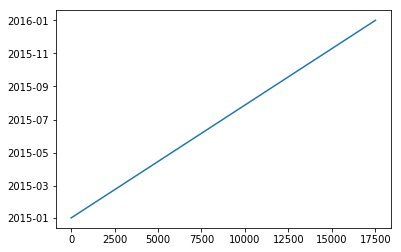

In [20]:
plt.plot(data['Time'])

In [21]:
data['total_power']=0
for i in data.columns:
    if i!='Date & Time':
            if i!='Time':
                if i!='hour':
                    data['total_power']+= data[i]



In [22]:
sample = data['total_power']
sample= sample.reshape(len(sample),-1)
pre1 = clf2.predict(sample)
pre2 = clf4.predict(sample)
print(pre1)

[2 2 2 ..., 2 2 2]


In [23]:
# pre1=pd.DataFrame(pre1)
data['predicted_occupancy_SVM']=pd.DataFrame(pre1)
data['predicted_occupancy_KNN']=pd.DataFrame(pre2)


In [41]:
data.groupby(['hour','predicted_occupancy_SVM']).size()
ax=pd.DataFrame.as_matrix(data.groupby(['hour','predicted_occupancy_KNN']).size())
print(ax)

[ 89  13 628 101  13 618 109  23 596  96  20 614 122  18 590 109  21 600
 124  16 590 115   7 608 137  25 568 125  26 579  99  25 606 106  21 603
 104  22 604  85  16 629  99  17 614  89  18 623  78  19 633  88  18 624
  77  19 634  81  16 633 100  15 615 101  19 610 100  21 609  79  25 626]


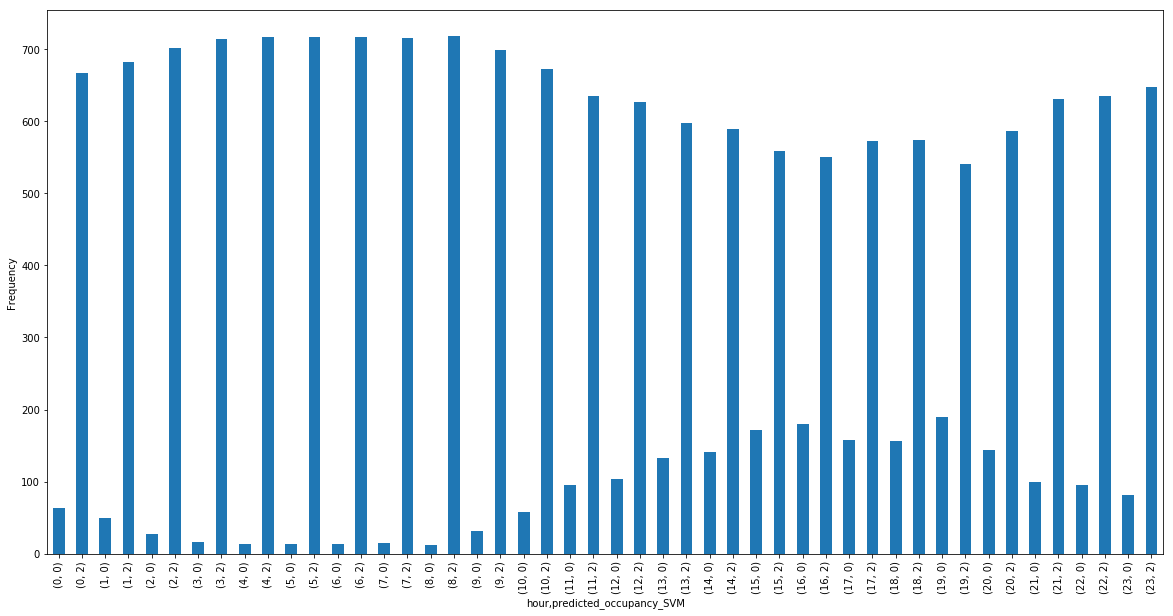

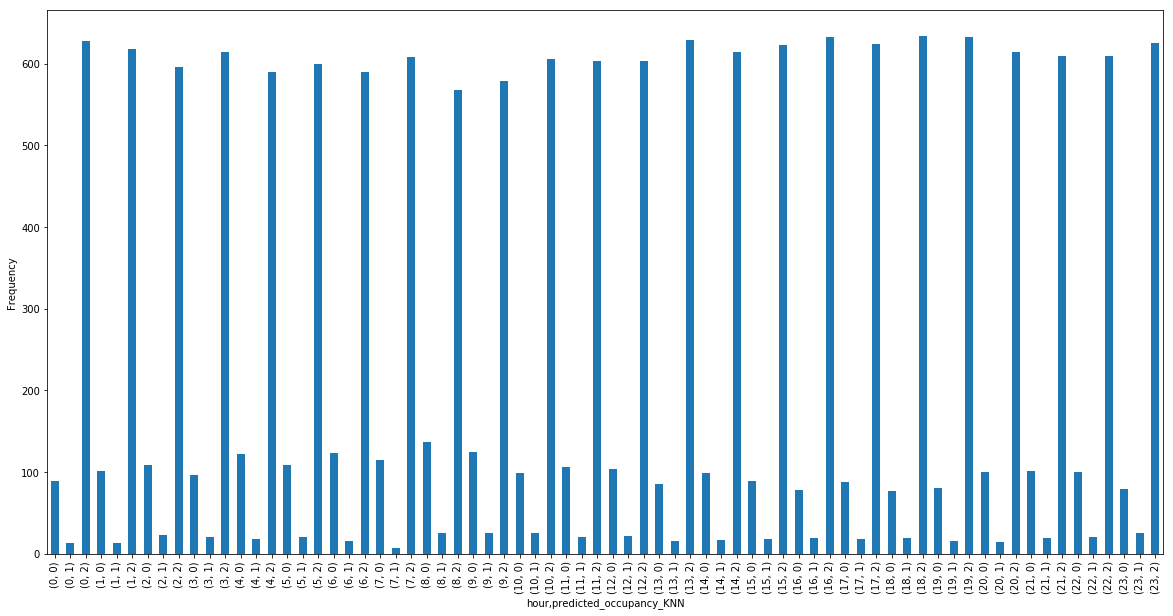

In [30]:
plt.figure(figsize=(20,10))
data.groupby(['hour','predicted_occupancy_SVM']).size().plot(kind='bar')
plt.ylabel('Frequency')
plt.figure(figsize=(20,10))
data.groupby(['hour','predicted_occupancy_KNN']).size().plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

# K-means Clustering

Text(0.5,1,'Clustering Analysis')

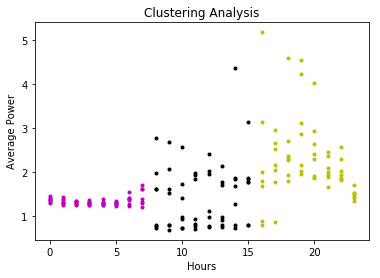

In [26]:
from sklearn.cluster import KMeans

Y=np.matrix.transpose(np.asarray([pd.Series.as_matrix(data1.groupby(['hour','dayofyear'])['hour'].mean()),
                                  pd.Series.as_matrix(data1.groupby(['hour','dayofyear'])['Power'].mean())]))



kmeans=KMeans(n_clusters=3)
kmeans.fit(Y)
centriods = kmeans.cluster_centers_
labels= kmeans.labels_

colors=["k.","y.","m.","c.","r.","g.","b."]


for qq in range(len(Y)):
    plt.plot(Y[qq][0],Y[qq][1],colors[labels[qq]])

plt.ylabel('Average Power')
plt.xlabel('Hours')
plt.title('Clustering Analysis')
